<a href="https://colab.research.google.com/github/angui100/AI-TensorFlow-Study-Group/blob/master/Transfer_Learning_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Transfer learning is a machine learning technique in which intelligence (i.e.: weights) from a base artificial neural network is being transferred to a new network as a starting point to perform a specific task. 
- Transfer learning is a key skill to acquire as a data scientist since it can dramatically reduce the computational time required if the network is being trained from scratch (i.e.: starting from purely random weights). 
- In this project, we are going to use a trained ANN known as MobileNet that come readily trained/available from TF 2.0 Hub
- We are going to use TensorFlow Flowers dataset 
- This code is based on TensorFlow 2.0 Hub documentation: 
https://www.tensorflow.org/beta/tutorials/images/hub_with_keras

**Setup running environment**

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

TensorFlow 2.x selected.


In [0]:
#!pip install tensorflow_hub

In [0]:
import tensorflow_hub as hub

In [0]:
trained_mobilenet_model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [0]:
trained_modilenet_model = tf.keras.Sequential([
            hub.KerasLayer( trained_mobilenet_model_url, input_shape = (224, 224, 3))
])

In [7]:
trained_modilenet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


**Evaluate the pretrained mobilenet model**

**Related references**<br/>

<ul>
<li>Check this out: http://www.image-net.org/synset?wnid=n02835271</li>
<li>Search for Bicycle</li>
<li>https://lear.inrialpes.fr/people/gordo/ImageNetResults/sift1000_accuracy_withPrior/results_sift_0253.htm</li>
</ul>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
bike_img = tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/projects/transferlearning/images/bike_2.jpg', target_size=(224, 224, 3))

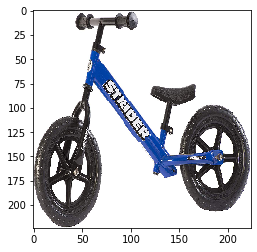

In [10]:
plt.imshow( bike_img )

In [0]:
bike_img_normalized = np.array( bike_img )/255.0

In [0]:
prediction = trained_modilenet_model.predict( np.expand_dims( bike_img_normalized, axis = 0)) #shape(1, 224, 224, 3)

In [13]:
prediction.shape

(1, 1001)

In [14]:
prediction

array([[ 0.32185087, -0.65515995, -1.2349476 , ..., -1.7711734 ,
        -0.43719605, -0.34752625]], dtype=float32)

In [15]:
np.argmax( prediction )

871

In [16]:
labels = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imgnet_labels = np.array( open( labels ).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


In [17]:
imgnet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [18]:
imgnet_labels[871]

'tricycle'

Text(0.5, 1.0, 'AI says, it is a(an) tricycle')

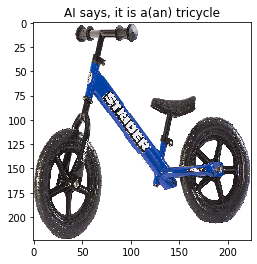

In [19]:
plt.imshow( bike_img )
predicted_class_name = imgnet_labels[ np.argmax( prediction )]
plt.title('AI says, it is a(an) {}'.format(predicted_class_name))

**Predicts multiple images**

In [21]:
# get tensorflow flower image dataset files
flower_dataset_files = tf.keras.utils.get_file(
    '/root/keras/datasets/flower_photos', 
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar = True
)

228818944/228813984 [==============================] - 3s 0us/step


In [0]:
#@title

try:
  fl_img = tarfile.open('/root/keras/datasets/flower_photos.tar.gz', mode = 'r')
  fl_img.extractall('/tmp/flower_photos/')
except Exception:
  print("Error on extract tar file....")

In [0]:
flower_dataset_files #= '/tmp/flower_photos/flower_photos'

In [24]:
# using image generator to process the raw dataset
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

flowers_dataset = image_generator.flow_from_directory(
    '/tmp/flower_photos/flower_photos',
    target_size = (224, 224),
    batch_size = 64, 
    shuffle = True
)

Found 3670 images belonging to 5 classes.


In [25]:
#sample_data = flowers_dataset.next()
#sample_data
for flowers_data_input_batch, flowers_data_label_batch in flowers_dataset:
  print('Image batch shape {}, Label batch shape {}'.format(flowers_data_input_batch.shape, flowers_data_label_batch.shape))
  break;


Image batch shape (64, 224, 224, 3), Label batch shape (64, 5)


In [26]:
predictions_batch = trained_modilenet_model.predict( flowers_data_input_batch)
predictions_batch.shape

(64, 1001)

In [27]:
predicted_class_names = imgnet_labels[ np.argmax( predictions_batch, axis = -1)]
predicted_class_names

array(['greenhouse', 'daisy', "yellow lady's slipper", 'coral fungus',
       'daisy', 'sarong', 'daisy', 'cab', 'mushroom', 'daisy', 'daisy',
       'picket fence', 'picket fence', 'rapeseed', 'spider web',
       'fountain', 'daisy', 'picket fence', 'daisy', 'vase', 'daisy',
       'mushroom', 'fountain', 'daisy', 'teddy', 'feather boa', 'cardoon',
       'earthstar', 'hip', 'daisy', 'daisy', 'daisy', 'cardoon',
       'pinwheel', 'broom', 'buckeye', 'daisy', "yellow lady's slipper",
       'daisy', 'pug', 'feather boa', 'sulphur butterfly', 'daisy',
       'picket fence', 'daisy', 'picket fence', 'daisy', 'picket fence',
       'picket fence', 'picket fence', 'daisy', 'limpkin',
       'cabbage butterfly', 'sea urchin', 'daisy', 'fly', 'bee',
       'barn spider', 'corn', 'picket fence', 'spider web', 'spider web',
       'daisy', 'sea urchin'], dtype='<U30')

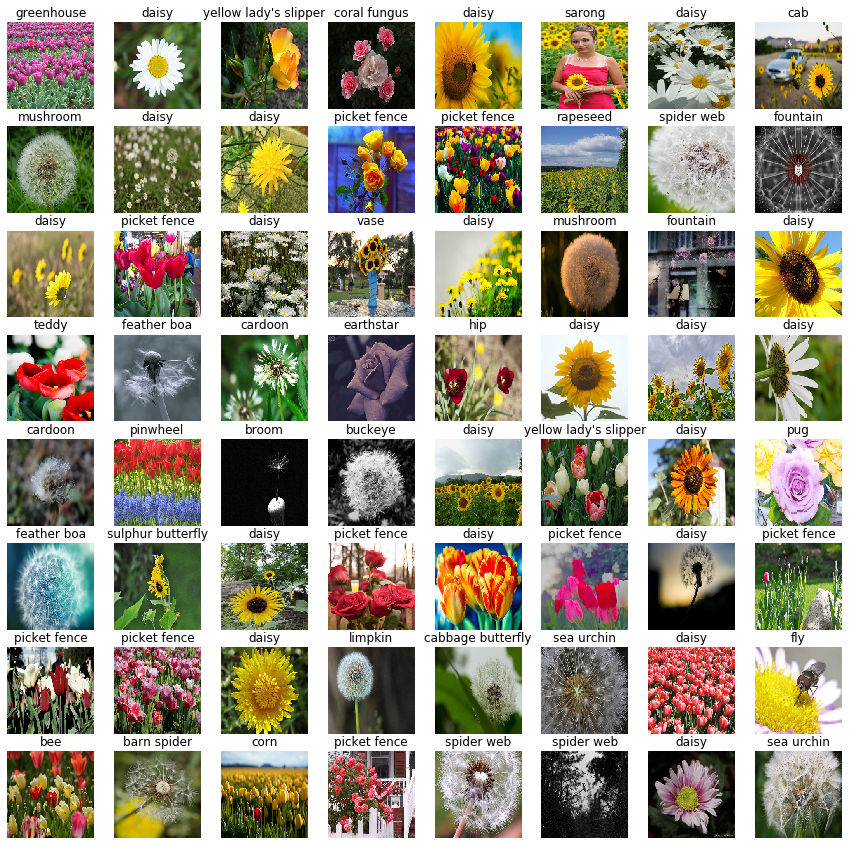

In [28]:
plt.figure( figsize=(15, 15) )

for n in range( 64 ):
  plt.subplot( 8, 8, n+1 )
  plt.imshow( flowers_data_input_batch[n])
  plt.title( predicted_class_names[n])
  plt.axis('off')

# Network performance is poor because it wasn't even trained to clasify these types of flowers!

**Apply transfer learning to retrain a new model**<br/>
- Let us download the MobileNet without the classification head from TensorFlow Hub:
https://tfhub.dev/s?module-type=image-feature-vector&q=tf2

In [0]:
mobile_features_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'

In [0]:
mobile_features_extractor_layer = hub.KerasLayer( mobile_features_url, input_shape = (224, 224, 3))

In [31]:
features_batch = mobile_features_extractor_layer( flowers_data_input_batch )
features_batch.shape

TensorShape([64, 1280])

In [0]:
mobile_features_extractor_layer.trainable = False

In [33]:
flowers_dataset.num_classes

5

In [34]:
# Create a new model with facts
# (1) MobileNet feature extractor
# (2) Dense Network (classifier) added at the top

model = tf.keras.Sequential([
        mobile_features_extractor_layer,
        tf.keras.layers.Dense( flowers_dataset.num_classes, activation = 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile( 
    optimizer = tf.keras.optimizers.Adam(), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'] 
    )

In [36]:
history = model.fit_generator( flowers_dataset, epochs = 10)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 58 steps
Epoch 1/10
58/58 [==============================] - 14s 245ms/step - loss: 0.7827 - accuracy: 0.7063
Epoch 2/10
58/58 [==============================] - 12s 204ms/step - loss: 0.3918 - accuracy: 0.8643
Epoch 3/10
58/58 [==============================] - 12s 206ms/step - loss: 0.3125 - accuracy: 0.8986
Epoch 4/10
58/58 [==============================] - 12s 204ms/step - loss: 0.2677 - accuracy: 0.9123
Epoch 5/10
58/58 [==============================] - 12s 207ms/step - loss: 0.2346 - accuracy: 0.9259
Epoch 6/10
58/58 [==============================] - 12s 211ms/step - loss: 0.2082 - accuracy: 0.9343
Epoch 7/10
58/58 [==============================] - 12s 209ms/step - loss: 0.1925 - accuracy: 0.9447
Epoch 8/10
58/58 [==============================] - 13s 216ms/step - loss: 0.1713 - accuracy: 0.9529
Epoch 9/10
58/58 [==============================] - 12s 204ms/step - loss: 0.1574 - accuracy: 0.9572
Epoch 10/10
58/58 [==============================] - 12s 205ms/step - lo

**Let us evaluate this new model**

In [37]:
class_names = sorted( flowers_dataset.class_indices.items(), key = lambda pair:pair[1])
class_names = np.array( [key.title() for key, value in class_names])
class_names


array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [46]:
flowers_data_input_batch.shape

(64, 224, 224, 3)

In [0]:
predicted_batch = model.predict( flowers_data_input_batch )
predict_id = np.argmax( predicted_batch, axis = -1)
predicted_label_batch = class_names[ predict_id ]

In [47]:
predicted_label_batch.shape

(64,)

In [0]:
label_id = np.argmax( predicted_label_batch, axis = -1)

In [45]:
label_id.shape

()

4 and Tulips
0 and Daisy
2 and Roses
2 and Roses
3 and Sunflowers
3 and Sunflowers
0 and Daisy
3 and Sunflowers
1 and Dandelion
1 and Dandelion
1 and Dandelion
2 and Roses
4 and Tulips
3 and Sunflowers
1 and Dandelion
1 and Dandelion
1 and Dandelion
4 and Tulips
0 and Daisy
3 and Sunflowers
1 and Dandelion
1 and Dandelion
2 and Roses
3 and Sunflowers
4 and Tulips
1 and Dandelion
1 and Dandelion
2 and Roses
4 and Tulips
3 and Sunflowers
3 and Sunflowers
0 and Daisy
1 and Dandelion
4 and Tulips
1 and Dandelion
1 and Dandelion
3 and Sunflowers
4 and Tulips
3 and Sunflowers
2 and Roses
1 and Dandelion
3 and Sunflowers
3 and Sunflowers
2 and Roses
4 and Tulips
4 and Tulips
1 and Dandelion
4 and Tulips
4 and Tulips
4 and Tulips
1 and Dandelion
1 and Dandelion
1 and Dandelion
1 and Dandelion
4 and Tulips
0 and Daisy
4 and Tulips
1 and Dandelion
4 and Tulips
2 and Roses
1 and Dandelion
1 and Dandelion
0 and Daisy
1 and Dandelion


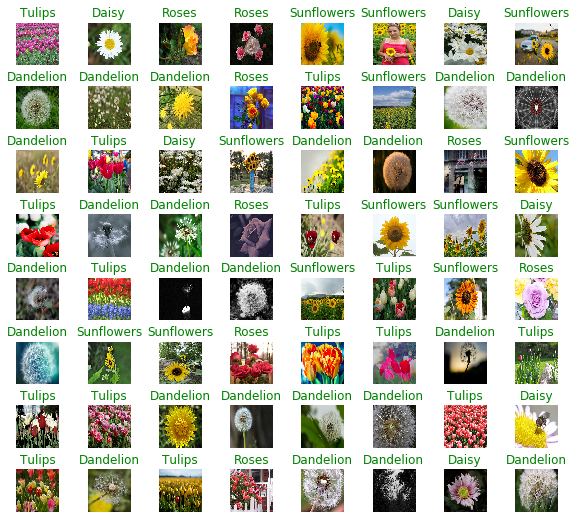

In [49]:
plt.figure( figsize = (10, 9) )
plt.subplots_adjust( hspace = 0.5)

for n in range( 64 ):
  plt.subplot( 8, 8, n+1 )
  plt.imshow( flowers_data_input_batch[n] )
  print('{} and {}'.format(predict_id[n], predicted_label_batch[n]))
  color = "green" 
  #if predicted_label_batch[predict_id[n]] == predicted_label_batch[n] else "red"
  plt.title( predicted_label_batch[n].title(), color = color)
  plt.axis('off')